Series Creation and Indexing in PANDAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
step_data=[3620,7891,9761,3907,4338,5373]
step_counts=pd.Series(step_data,name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


Indexing 

In [3]:
step_counts.index=pd.date_range('20180124',periods=6)
print(step_counts)

2018-01-24    3620
2018-01-25    7891
2018-01-26    9761
2018-01-27    3907
2018-01-28    4338
2018-01-29    5373
Freq: D, Name: steps, dtype: int64


Select using Index Values

In [4]:
print(step_counts['2018-01-27'])
print(step_counts[3])#like an Array
print(step_counts['2018'])# Selecting all of 2018
print(step_counts.dtype)#View the data type

3907
3907
2018-01-24    3620
2018-01-25    7891
2018-01-26    9761
2018-01-27    3907
2018-01-28    4338
2018-01-29    5373
Freq: D, Name: steps, dtype: int64
int64


In [5]:
step_counts=step_counts.astype(np.float)#to convert dtype
print(step_counts.dtype)

float64


Invalid data Points

In [6]:
step_counts[1:3]=np.NaN
print(step_counts)

2018-01-24    3620.0
2018-01-25       NaN
2018-01-26       NaN
2018-01-27    3907.0
2018-01-28    4338.0
2018-01-29    5373.0
Freq: D, Name: steps, dtype: float64


In [7]:
step_counts.fillna(0.,inplace=True)#step_counts=step_counts.fillna(0.)
print(step_counts)

2018-01-24    3620.0
2018-01-25       0.0
2018-01-26       0.0
2018-01-27    3907.0
2018-01-28    4338.0
2018-01-29    5373.0
Freq: D, Name: steps, dtype: float64


Pandas Data Frame Creation and Methods

In [8]:
cycling_data=[10.7,0,None,2.4,15.3,10.9,0,None]
joined_data=list(zip(step_data,cycling_data))
#activity_df=pd.DataFrame(joined_data)
activity_df=pd.DataFrame(joined_data,index=pd.date_range('20180105',periods=6),columns=['Walking','Cycling'])
print(activity_df)
print(activity_df.loc['2018-01-07'])#single row
print(activity_df.iloc[-2])#select row by integer position

            Walking  Cycling
2018-01-05     3620     10.7
2018-01-06     7891      0.0
2018-01-07     9761      NaN
2018-01-08     3907      2.4
2018-01-09     4338     15.3
2018-01-10     5373     10.9
Walking    9761.0
Cycling       NaN
Name: 2018-01-07 00:00:00, dtype: float64
Walking    4338.0
Cycling      15.3
Name: 2018-01-09 00:00:00, dtype: float64


In [9]:
print(activity_df['Walking'])#Indexing columns
print(activity_df.Cycling)#object Oriented Approach

2018-01-05    3620
2018-01-06    7891
2018-01-07    9761
2018-01-08    3907
2018-01-09    4338
2018-01-10    5373
Freq: D, Name: Walking, dtype: int64
2018-01-05    10.7
2018-01-06     0.0
2018-01-07     NaN
2018-01-08     2.4
2018-01-09    15.3
2018-01-10    10.9
Freq: D, Name: Cycling, dtype: float64


In [10]:
file_path='data/Iris_Data.csv'
data=pd.read_csv(file_path)
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Assigning new Data to Data Frame

In [11]:
data['sepal_area']=data.sepal_length*data.sepal_width#create new column
print(data.iloc[:5,-3:])#[rows,cols]

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [12]:
data['abbrev']=data.species.apply(lambda x:x.replace('Iris','I'))
print(data.iloc[:5,-3:])

       species  sepal_area    abbrev
0  Iris-setosa       17.85  I-setosa
1  Iris-setosa       14.70  I-setosa
2  Iris-setosa       15.04  I-setosa
3  Iris-setosa       14.26  I-setosa
4  Iris-setosa       18.00  I-setosa


In [13]:
small_data=pd.concat([data.iloc[:2],data.iloc[-2:]])
print(small_data)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     sepal_area       abbrev  
0         17.85     I-setosa  
1         14.70     I-setosa  
148       21.08  I-virginica  
149       17.70  I-virginica  


In [14]:
grp_sizes=data.groupby('species').size()
print(grp_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [15]:
print(data.mean())#calculating mean
print(data.petal_length.median())
print(data.petal_length.mode())
print(data.petal_length.std(),data.petal_length.var(),data.petal_length.sem())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64
1.7644204199522617 3.1131794183445156 0.144064324021


In [16]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [17]:
sample=data.sample(n=5,replace=False,random_state=42)
print(sample.iloc[:,-3:])

             species  sepal_area        abbrev
73   Iris-versicolor       17.08  I-versicolor
18       Iris-setosa       21.66      I-setosa
118   Iris-virginica       20.02   I-virginica
78   Iris-versicolor       17.40  I-versicolor
76   Iris-versicolor       19.04  I-versicolor


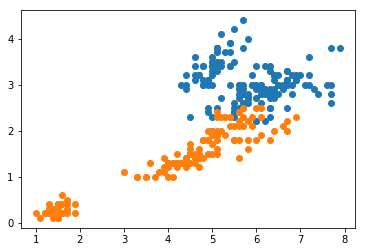

In [18]:
plt.plot(data.sepal_length,data.sepal_width,ls='',marker='o',label='sepals')
plt.plot(data.petal_length,data.petal_width,ls='',marker='o',label='petals')

(array([  4.,  19.,  25.,   2.,   0.,   0.,   0.,   0.,   1.,   2.,   2.,
          3.,   8.,   9.,  12.,   8.,  13.,  10.,   4.,  12.,   5.,   5.,
          2.,   1.,   3.]),
 array([ 1.   ,  1.236,  1.472,  1.708,  1.944,  2.18 ,  2.416,  2.652,
         2.888,  3.124,  3.36 ,  3.596,  3.832,  4.068,  4.304,  4.54 ,
         4.776,  5.012,  5.248,  5.484,  5.72 ,  5.956,  6.192,  6.428,
         6.664,  6.9  ]),
 <a list of 25 Patch objects>)

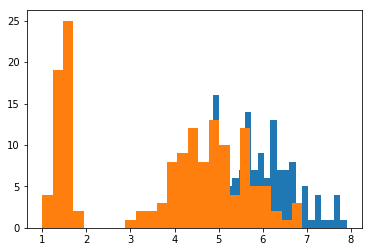

In [19]:
plt.hist(data.sepal_length,bins=25)
plt.hist(data.petal_length,bins=25)